In [1]:
import pandas as pd

In [73]:
df=pd.read_excel("Final.xlsx")
df

,SEQ,F_BEGIN_DE,F_END_DE,F_BEGIN_TM,F_END_TM,FLUD_TIME,FLUD_DPWT,SLOPE_L,SLOPE_H,SLOPE_AVG,HIGH,PUMP_RATIO,IMP_SUR_RATIO,MANHOLES_RATIO,HOUR_RAINFALL,PRECI_YYMMDDHH,PRECI_HH,DIST
0,30581,20090716,20090716,800,1200,4,0.433,0.0,2,1.0,1.98,1.485884e-07,38.20,0.017684,39.0,20090716,7,1
1,30581,20090716,20090716,800,1200,4,0.433,0.0,2,1.0,1.98,1.485884e-07,38.20,0.017684,78.0,20090716,8,1
2,30581,20090716,20090716,800,1200,4,0.433,0.0,2,1.0,1.98,1.485884e-07,38.20,0.017684,54.5,20090716,9,1
3,30581,20090716,20090716,800,1200,4,0.433,0.0,2,1.0,1.98,1.485884e-07,38.20,0.017684,46.0,20090716,10,1
4,30581,20090716,20090716,800,1200,4,0.433,0.0,2,1.0,1.98,1.485884e-07,38.20,0.017684,15.5,20090716,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,102001,20190719,20190720,2300,1200,13,0.000,0.0,2,1.0,1.57,1.189961e-07,24.36,0.006944,4.8,20190720,7,0
1336,102001,20190719,20190720,2300,1200,13,0.000,0.0,2,1.0,1.57,1.189961e-07,24.36,0.006944,9.6,20190720,8,0
1337,102001,20190719,20190720,2300,1200,13,0.000,0.0,2,1.0,1.57,1.189961e-07,24.36,0.006944,18.7,20190720,9,0
1338,102001,20190719,20190720,2300,1200,13,0.000,0.0,2,1.0,1.57,1.189961e-07,24.36,0.006944,15.2,20190720,10,0


## 데이터 세트 분리하기

In [75]:
from sklearn.model_selection import train_test_split

x = df[['HOUR_RAINFALL','SLOPE_AVG','PUMP_RATIO','IMP_SUR_RATIO','MANHOLES_RATIO']]
y = df[['DIST']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)

## 모델 생성하기

In [76]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [78]:
my_apartment = [[65,4.5,1.485884e-07,38.20,0.017684]]
my_predict = mlr.predict(my_apartment)

In [79]:
y_predict = mlr.predict(x_test)

## 시각화

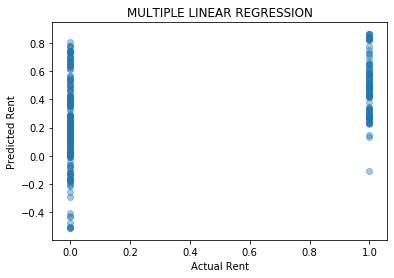

In [80]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

## 회귀계수와 상수 확인하기

In [81]:
print(mlr.coef_)

[[ 8.35700410e-03 -8.91393060e-03 -5.68000421e+04 -8.14131967e-04
   3.71720306e+00]]


## 상관 살펴보기

### HOUR_RAINFALL과 상관관계

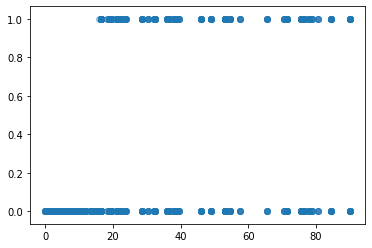

In [83]:
# 주택의 면적 'size_sqft'과 가격 'rent'
plt.scatter(df[['HOUR_RAINFALL']], df[['DIST']], alpha=0.4)
plt.show()

### SLOPE와 상관관계

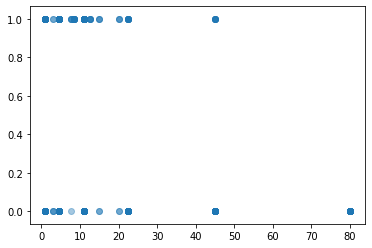

In [85]:
plt.scatter(df[['SLOPE_AVG']], df[['DIST']], alpha=0.4)
plt.show()

## 모델의 정확도 평가하기
- 결정계수 R²가 클수록 실제값과 예측값이 유사함을 의미하며, 데이터를 잘 설명한다

In [86]:
print(mlr.score(x_train, y_train))

0.30119531980578285
